# Задание №12. Случайный лес

В этом задании вам нужно проследить за изменением качества случайного леса в зависимости от количества деревьев в нем.
Загрузите данные из файл abalone.csv.
Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.


In [13]:
import pandas as pd

data = pd.read_csv('abalone.csv')

Преобразуйте признак **Sex** в числовой: значение F должно перейти в -1, I — в 0, M — в 1.
Если вы используете Pandas, то подойдет следующий код: 


In [14]:
data['Sex'] = data['Sex'].map({'F': -1, 'I': 0, 'M': 1})


Разделите содержимое файлов на признаки и целевую переменную.
В последнем столбце записана целевая переменная, в остальных — признаки.


In [15]:
X = data.drop('Rings', axis=1)
y = data['Rings']

Обучите случайный лес `sklearn.ensemble.RandomForestRegressor` с различным числом деревьев: от 1 до 50 (не забудьте выставить `random_state=1` в конструкторе).
Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам.
Используйте параметры `random_state=1` и `shuffle=True` при создании генератора кросс-валидации `sklearn.cross_validation.KFold`. В качестве меры качества воспользуйтесь коэффициентом детерминации `sklearn.metrics.r2_score`.


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

n_estimators = np.arange(1, 51)
cv = KFold(n_splits=5, shuffle=True, random_state=1)
model = RandomForestRegressor(random_state=1)
grid = {'n_estimators': n_estimators}
gs = GridSearchCV(model, grid, cv=cv, scoring='r2')

gs = gs.fit(X, y) 


Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52.
Это количество и будет ответом на задание.
Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

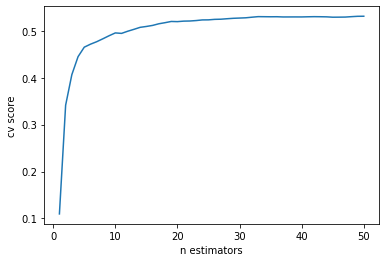

In [30]:
from matplotlib import pyplot as plt

test_score = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, test_score)
plt.xlabel('n estimators')
plt.ylabel('cv score');

In [26]:
min_tree_count = np.min(n_estimators[test_score > 0.52])
min_tree_count

21